In [ ]:
## code examples adopted from Mike X Cohen Udemy Course for educational purposes only
# https://www.udemy.com/course/deeplearning_x/learn/lecture/27841856#overview
# some code is modified from the original for my own purposes

In [5]:
import numpy as np 
import pandas as pd 
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import scipy.stats as stats
import sympy as sym
import sympy.plotting.plot as symplot
from IPython.display import display
import math

In [6]:
### Lesson: transpose a vector and matrix ###

## numpy ##
# create a vector
nv = np.array([ [1,2,3,4] ])
print(nv), print(' ')

# transpose the vector
print(nv.T), print(' ')

# double tranpose
nvT = nv.T
print(nvT)

[[1 2 3 4]]
 
[[1]
 [2]
 [3]
 [4]]
 
[[1]
 [2]
 [3]
 [4]]


In [11]:
### Lesson: transpose a vector and matrix ###

## numpy ##
# create a 2 x 4 matrix
nM = np.array([ [1,2,3,4], 
                [5,6,7,8]   
              ])
print(nM), print(' ')

# transpose the matrix
print(nM.T), print(' ')

# transpose the transpose!
nMT = nM.T
print(nMT.T)


[[1 2 3 4]
 [5 6 7 8]]
 
[[1 5]
 [2 6]
 [3 7]
 [4 8]]
 
[[1 2 3 4]
 [5 6 7 8]]


In [15]:
### Lesson: transpose a vector and matrix ###

## PyTorch ##
# create a vector
tv = torch.tensor([ [1,2,3,4] ])
print(tv), print(' ')

# transpose the vector
print(tv.T), print(' ')

# double tranpose it
tvT = tv.T
print(tvT.T)

tensor([[1, 2, 3, 4]])
 
tensor([[1],
        [2],
        [3],
        [4]])
 
tensor([[1, 2, 3, 4]])


In [19]:
### Lesson: transpose a vector and matrix ###

## Pytorch ##
# create a matrix
tM = torch.tensor([ [1,2,3,4], 
                   [5,6,7,8]
                  ])
print(tM), print(' ')

# transpose the matrix
print(tM.T), print(' ')

# transpose the transpose!
tMT = tM.T
print(tMT.T)

tensor([[1, 2, 3, 4],
        [5, 6, 7, 8]])
 
tensor([[1, 5],
        [2, 6],
        [3, 7],
        [4, 8]])
 
tensor([[1, 2, 3, 4],
        [5, 6, 7, 8]])


In [21]:
### Lesson: transpose a vector and matrix ###
# examine data  types
print(f'Variable nv is of type {type(nv)}')
print(f'Variable nM is of type {type(nM)}')
print(f'Variable tv is of type {type(tv)}')
print(f'Variable tM is of type {type(tM)}')

Variable nv is of type <class 'numpy.ndarray'>
Variable nM is of type <class 'numpy.ndarray'>
Variable tv is of type <class 'torch.Tensor'>
Variable tM is of type <class 'torch.Tensor'>


In [9]:
### Lesson: dot product ###

## dot products in numpy ##
# create a vector
nv1 = np.array([1,2,3,4])
nv2 = np.array([0,1,0,-1])

# dot product via function
print(np.dot(nv1,nv2))

# dot product via computation
print(np.sum(nv1*nv2))

-2
-2


In [12]:
### Lesson: dot product ###
## dot products in PyTorch ##

# create a vector
tv1 = torch.tensor([1,2,3,4])
tv2 = torch.tensor([0,1,0,-1])

# dot product via function
print(torch.dot(tv1,tv2))

# dot product via computation
print(torch.sum(tv1*tv2))

tensor(-2)
tensor(-2)


In [30]:
### Lesson: matrix multiplication product ###
## matrix multiplication in numpy ##

# create some random matrices
A = np.random.randn(3,4)
B = np.random.randn(4,5)
C = np.random.randn(3,7)

# try out some multiplications...
# syntax notes: np.matmul(A,B) is the same as A@B
print(np.round(A@B ,2)), print(' ')

# try out a transpose
print(np.round(C.T@A, 2)),print(' ')

result_mult = np.matmul(A,B)
rounded_result = np.round(result_mult,2)
print(rounded_result)


[[ 2.41  0.98  1.44  1.05  0.32]
 [ 1.55  2.31  3.75  0.04 -1.91]
 [-0.36  0.28  1.17 -0.02 -0.41]]
 
[[ 0.8   0.96 -0.48  0.71]
 [-0.09 -0.2   0.84  1.12]
 [-0.81 -0.93  0.64 -1.86]
 [ 0.2   0.27  0.15 -0.54]
 [ 1.4   1.85 -2.53 -0.6 ]
 [-0.15 -0.33  1.23  2.12]
 [ 1.52  2.07 -3.93 -1.1 ]]
 
[[ 2.41  0.98  1.44  1.05  0.32]
 [ 1.55  2.31  3.75  0.04 -1.91]
 [-0.36  0.28  1.17 -0.02 -0.41]]


In [32]:
### Lesson: matrix multiplication product ###
## matrix multiplication in PyTorch ##

# create some random matrices
A = torch.randn(3,4)
B = torch.randn(4,5)
C1 = np.random.randn(4,7) # defined using numpy
C2 = torch.tensor( C1, dtype=torch.float)

# multiply two tensors
print(np.round( A@B, 2)), print(' ')

# multiply a matrix defined using PyTorch and a matrix defined using numpy
print(np.round(A@C1, 2)), print(' ')

tensor([[ 0.0200,  1.1600,  0.0300,  0.2500, -0.2800],
        [ 3.8200,  1.8900,  1.2000,  0.6000, -6.8400],
        [ 1.4200, -0.1800,  0.7900, -0.9400, -0.1400]])
 
tensor([[-0.8800, -0.0900,  0.1300, -0.1600,  1.2900, -0.2800,  0.0100],
        [ 0.0600, -2.5400,  1.2800, -2.5100, -1.4800, -5.4700, -5.2300],
        [-0.7900,  0.3100,  0.4000,  0.5100, -1.9000, -1.0100, -2.6000]],
       dtype=torch.float64)
 


(None, None)

In [5]:
## Lesson: Logits and the softmax function ##
## build a logit function ##
# a logit is simply the log-odds of a probability value 
# the logit operations preceeds the softmax function operation 

def logit(p):
    if p <= 0 or p >=1: # ensure we get a  probability value
        raise valueError("p must be between 0 and 1 (exclusive).")
    return np.log(p/(1-p)) # log(odds)

# example of a probability value
p = 0.8
logit_value = logit(p)
print(round(logit_value,4)) # Output should be approximately 1.386

1.3863


In [9]:
## Lesson: Logits and the softmax function ##
## softmax function ##
# once you perform the logit function then you perform the softmax function
# the softmax function converts a vector of numbers into a probability distribution

# The np.exp() function in NumPy is used to compute 𝑒^𝑥 for each element in the input array
scalar = 1
e = np.exp(scalar)
print(e)
  
# build the softmax function
def softmax(z):
    exp_z = np.exp(z- np.max(z)) # Subtract max for numerical stability
    return exp_z / np.sum(exp_z)

# vector
logits = np.array([1.0,2.0,3.0])
probabilities = softmax(logits)
print(np.round(probabilities,4))

2.718281828459045
[0.09   0.2447 0.6652]


In [14]:
## Lesson: Logits and the softmax function ##
# full example combining both logits and the softmax #
#  initial probabilities 

# vector of probabilities 
probabilities = np.array([0.1, 0.3 ,0.6])
print(f'vector: {probabilities}')

# convert the vector into logits
def logit(p):
    return np.log(p/(1-p))

logits = logit(probabilities)
print(f'logits: {np.round(logits,4)}')

# apply the softmax function and ensure the resulting probabilities sum to 1.
def softmax(z):
    exp_z = np.exp(z - np.max(z))
    return exp_z / np.sum(exp_z)

softmax_probabilities = softmax(logits)
print("Softmax Probabilities:", np.round(softmax_probabilities, 4))
print("Sum of Softmax Probabilities:", np.sum(softmax_probabilities))

vector: [0.1 0.3 0.6]
logits: [-2.1972 -0.8473  0.4055]
Softmax Probabilities: [0.0545 0.2101 0.7354]
Sum of Softmax Probabilities: 1.0


random numbers: 
 [-4  3  7  2 -1 14  0 -4 -5 -5  9  7 -3 10 -3 13  4  6  7 -3  4  8  0 14
  0]

softmax result: 
[6.34953011e-09 6.96310526e-06 3.80172666e-04 2.56158327e-06
 1.27533721e-07 4.16909951e-01 3.46672598e-07 6.34953011e-09
 2.33586159e-09 2.33586159e-09 2.80911715e-03 3.80172666e-04
 1.72598123e-08 7.63597211e-03 1.72598123e-08 1.53372600e-01
 1.89276825e-05 1.39857708e-04 3.80172666e-04 1.72598123e-08
 1.89276825e-05 1.03341645e-03 3.46672598e-07 4.16909951e-01
 3.46672598e-07]


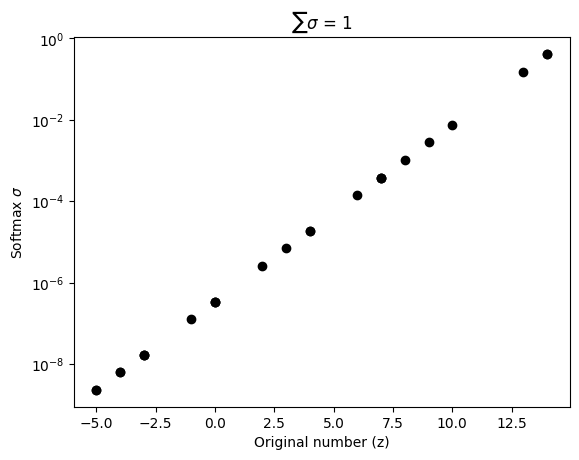

In [38]:
## Lesson: Logits and the softmax function ##
## combine numpy with some visualizations ##

# compute some random numbers
z = np.random.randint(-5, high=15, size=25)
print(f'random numbers: \n {z}')

# compute the softmax result
num = np.exp(z)
denominator = np.sum(num)
sigma = num / denominator
print(f'\nsoftmax result: \n{sigma}')

# plot and compare
plt.plot(z, sigma, 'ko')
plt.xlabel('Original number (z)')
plt.ylabel('Softmax $\sigma$')

# in log scale
plt.yscale('log')

plt.title('$\sum\sigma$ = %g' %np.sum(sigma))
plt.show()



In [39]:
## Lesson: Logits and the softmax function ##
## PyTorch example 

# compute some random numbers
z = np.random.randint(-5, high=15, size=25)
print(f'random numbers: \n {z}')

# create an instance of the softmax activation class
softfunc = nn.Softmax(dim=0)

# apply the data to that function
sigmaT = softfunc( torch.Tensor(z))

# softmax results
print(sigmaT)

random numbers: 
 [ 8 -1 14  1 13 14  5 10 -2  3  8  7 10 13  5  7  9  3 14  4  7  3 14  1
 -2]
tensor([5.1779e-04, 6.3900e-08, 2.0889e-01, 4.7216e-07, 7.6847e-02, 2.0889e-01,
        2.5779e-05, 3.8260e-03, 2.3508e-08, 3.4888e-06, 5.1779e-04, 1.9048e-04,
        3.8260e-03, 7.6847e-02, 2.5779e-05, 1.9048e-04, 1.4075e-03, 3.4888e-06,
        2.0889e-01, 9.4837e-06, 1.9048e-04, 3.4888e-06, 2.0889e-01, 4.7216e-07,
        2.3508e-08])


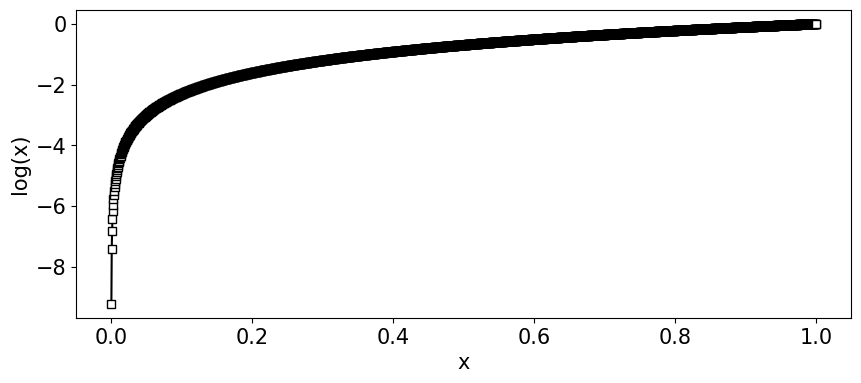

In [3]:
## Lesson: logarithms ##
# define a set of points to evaluate
x = np.linspace(.0001,1,2000)

# compute the log
logx = np.log(x)

# plot
fig = plt.figure(figsize=(10,4))

# increase font size
plt.rcParams.update({'font.size': 15})

plt.plot(x,logx, 'ks-',markerfacecolor='w')
plt.xlabel('x')
plt.ylabel('log(x)')
plt.show()

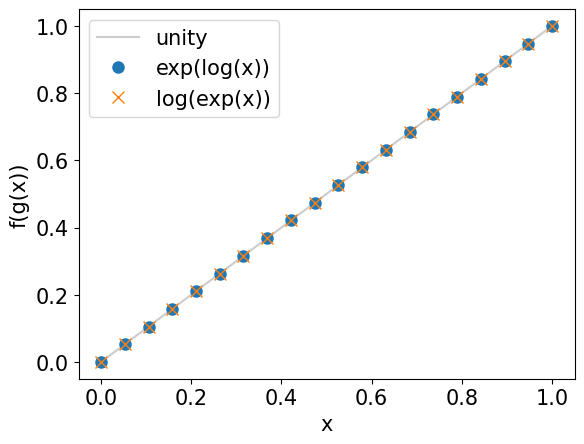

In [6]:
## Lesson: logarithms ##
# demonstrate that log and exp are inverses

# redfine with fewer points
x = np.linspace(.0001,1,20)

# log and exp
logx = np.log(x)
expx = np.exp(x)

# plot
plt.plot(x,x, color=[.8,.8,.8])
plt.plot(x, np.exp(logx), 'o',markersize=8)
plt.plot(x,np.log(expx), 'x', markersize=8)
plt.xlabel('x')
plt.ylabel('f(g(x))')
plt.legend(['unity', 'exp(log(x))', 'log(exp(x))'])
plt.show()

In [10]:
## Lesson: Shannon Entropy ###
# ** Very Important concept in DL is binary entropy when there are exactly two events

## ** Remember: for Shannon Entropy we need both
# 1) probabiity of an event happening AND
# 2) probability of an event not happening
p = 0.25
q = 1-0.25

# compute binary entropy (Shannon entropy)
H = -(p*np.log(p) + q*np.log(q))
print(f'entropy: {np.round(H,4)}')

# alternative method using a for loop to compute binary entropy
# create a vector
x = [0.25, 0.75]
H = 0
for p in x:
    H -= p*np.log(p)
print(f'entropy: {np.round(H,4)}')

entropy: 0.5623
entropy: 0.5623


In [12]:
## Lesson: cross-entropy ###
# ** Very Important concept in DL is binary cross-entropy when there are exactly two events
# classification problem: cat or not a cat

# all probability distributions must sum to 1
# p is the true probability distribution
# q is the predicted probability distribution
p = [  1,0 ] # true distribution
q = [  0.25, 0.75  ] # predicted distribution
H = 0
for i in range(len(p)):
    H -= (p[i]*np.log(q[i]))
print('cross-entropy: ' + str(H))

cross-entropy: 1.3862943611198906


In [13]:
## Lesson: cross-entropy ###
# simplify the binary entropy when the binary valuess are 1 and 0.

# probability distributions
p = [  1,0 ] # true distribution
q = [  0.25, 0.75  ] # predicted distribution

# binary entropy formula
H = -(p[0]*np.log(q[0]) + p[1]*np.log(q[1]))

# simplify using algebra since the second part of the formula has 0 as the variable 
H = -(p[0]*np.log(q[0]) + 0)

# simplify further since the first part of the formula has 1 as the variable
H = -np.log(q[0])

print('cross entropy: ' + str(H))

cross entropy: 1.3862943611198906


In [16]:
## Lesson: cross-entropy ###
# In PyTorch

# probability distributions
p = [  1,0 ] # true distribution
q = [  0.25, 0.75  ] # predicted distribution

# note: inputs must be Tensors (NOT Python lists)
q_tensor = torch.Tensor(q)
p_tensor = torch.Tensor(p)

# note: the order matters(predicted, true)
F.binary_cross_entropy(q_tensor,p_tensor)

tensor(1.3863)

In [8]:
## Lesson: argmin / argmax functions ##

# create a vector
v = np.array([1,40,3,-2])

# find and report the maximum and minimum values
minval = np.min(v)
maxval = np.max(v)
print('Min,max: %g,%g'%(minval, maxval))

# argmin and argmax fucntions
minidx = np.argmin(v)
maxidx = np.argmax(v)
print('Min,max indices: %g,%g' %(minidx, maxidx), '\n' )

# confirm with indexing
print(f'Min val is { v[minidx]}, max val is { v[maxidx]}')

Min,max: -2,40
Min,max indices: 3,1 

Min val is -2, max val is 40


In [13]:
## Lesson: argmin / argmax functions ##
# compute minimum / maximum values in matrices

# numpy matrix
M = np.array([
             [0,1,10],
             [20,8,5]
            ])
print(M), print(' ')

# minimum for the matrix
minivals1 = np.min(M)
print(f'minimum for the matrix: {minivals1}')

# minimum of each column (across rows)
minivals2 = np.min(M, axis=0)
print(f'minimum of each column: {minivals2}')

# minimum of each row (across columns)
minivals3 = np.min(M, axis=1)
print(f'minimum of each row: {minivals3}')


[[ 0  1 10]
 [20  8  5]]
 
minimum for the matrix: 0
minimum of each column: [0 1 5]
minimum of each row: [0 5]


In [14]:
## Lesson: argmin / argmax functions ##
# compute argmin / argmax values in matrices

# numpy matrix
M = np.array([
             [0,1,10],
             [20,8,5]
            ])
print(M), print(' ')

# minimum for the matrix
minidx1 = np.argmin(M)
print(f'minimum for the matrix: {minidx1}')

# minimum of each column (across rows)
minidx2 = np.argmin(M, axis=0)
print(f'minimum of each column: {minidx2}')

# minimum of each row (across columns)
minidx3 = np.argmin(M, axis=1)
print(f'minimum of each row: {minidx3}')


[[ 0  1 10]
 [20  8  5]]
 
minimum for the matrix: 0
minimum of each column: [0 0 1]
minimum of each row: [0 2]


In [24]:
## Lesson: argmin / argmax functions ##
# Pytorch argmin / argmax functions with a vector

V = torch.tensor([1,40,2,-3])
print(v)

# get the minimum and maximum values
minval = torch.min(V)
print('Min val: ',minval)

maxval = torch.max(V)
print('Max val: ', maxval, '\n')


#argmin / argmax
minidx = torch.argmin(V)
print('argmin index:', minidx)

maxidx = torch.argmax(V)
print('argmax index: ', maxidx)

[ 1 40  3 -2]
Min val:  tensor(-3)
Max val:  tensor(40) 

argmin index: tensor(3)
argmax index:  tensor(1)


In [33]:
## Lesson: argmin / argmax functions ##
# Pytorch argmin / argmax functions with a matrix

# create a tenor
M = torch.tensor([
             [0,1,10],
             [20,8,5]
            ])
print(M), print(' ')

# minimum for the matrix
min1 = torch.min(M)
print(f'minimum for the matrix: {min1}\n')

# minimum of each column (across rows)
min2 = torch.min(M,axis=0)
print(f'minimum of each column: {min2}\n')

# minimum of each row (across columns)
min3 = torch.min(M, axis=1)
print(f'minimum of each row: {min3}\n')

# access values and indices
print(min2.values)
print(min2.indices)

tensor([[ 0,  1, 10],
        [20,  8,  5]])
 
minimum for the matrix: 0

minimum of each column: torch.return_types.min(
values=tensor([0, 1, 5]),
indices=tensor([0, 0, 1]))

minimum of each row: torch.return_types.min(
values=tensor([0, 5]),
indices=tensor([0, 2]))

tensor([0, 1, 5])
tensor([0, 0, 1])


In [17]:
## Lesson: mean and variance in numpy ##

x = [1,2,4,6,5,4,0]
n = len(x)
print(x)
print(f'n: {n}')

# compute the mean
mean1 = np.mean(x)
mean2 = np.sum(x) / n

# print
print(f'mean: {round(mean1,3)}')
print(f'mean: {round(mean2,3)}')

# variance
var1 = np.var(x, ddof=1) # you need to input the degrees of freedom to remove bias
var2 = (1/(n-1)) * np.sum( (x-mean1)**2)

print(f'variance: {round(var1, 2)}')
print(f'variance: {round(var2, 2)}')

[1, 2, 4, 6, 5, 4, 0]
n: 7
mean: 3.143
mean: 3.143
variance: 4.81
variance: 4.81


population mean: 1.4
a single sample mean (n=5): 4.4

SDSM Histogram


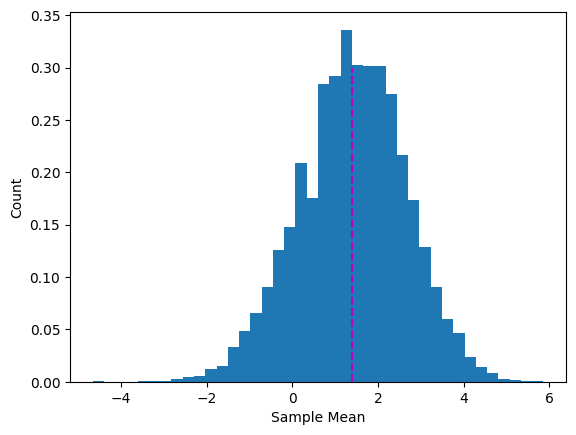

In [16]:
## Lesson: sampling and variability for numpy ##

# create a list of numbers to compute
x = [1,2,4,6,5,4,0,-4,-2,6,10,-9,1,3,-6]
n = len(x)

# compute the population mean
popmean = np.mean(x)
print(f'population mean: {round(popmean,2)}')

# compute a single  sample mean
sample = np.random.choice(x, size=5, replace=True)
sampmean = np.mean(sample)
print(f'a single sample mean (n=5): {round(sampmean,2)}\n')

# compute lots of sample means
# number of experiments to run
nExpers  =10000

# run the experiment
sampleMeans = np.zeros(nExpers)
for i in range(nExpers):
    
    # step 1: draw a smaple
    sample = np.random.choice(x, size=15,replace=True)
    
    # step 2: compute its mean
    sampleMeans[i] = np.mean(sample)
    
# show the results as a histogram
print('SDSM Histogram')
plt.hist(sampleMeans, bins=40, density=True)
plt.plot([popmean,popmean], [0,.3], 'm--')
plt.ylabel('Count')
plt.xlabel('Sample Mean')
plt.show()

In [19]:
## Lesson: Randomnes and Seed function mechanism in numpy (old method) ##

# choose how many desired random numbers
num = 5

# generate a few random numbers
np.random.randn(num)

# fix the seed 
np.random.seed(17) # the seed number does not matter

# generate the output
# you should get the exact same random numbers due to the fixed seed
print(f'random number with seed: {np.random.randn(num)}')
print(f'random number with seed: {np.random.randn(num)}')

# random number with seed: [ 0.27626589 -1.85462808  0.62390111  1.14531129  1.03719047]
# random number with seed: [ 1.88663893 -0.11169829 -0.36210134  0.14867505 -0.43778315]

random number with seed: [ 0.27626589 -1.85462808  0.62390111  1.14531129  1.03719047]
random number with seed: [ 1.88663893 -0.11169829 -0.36210134  0.14867505 -0.43778315]


In [26]:
## Lesson: Randomnes and Seed function mechanism in numpy (new method) ##

# choose how many desired random numbers
num = 5

# choose seeds
seed1 = 17
seed2 = 20210530
randseed1 = np.random.RandomState(seed1) 
randseed2 = np.random.RandomState(seed2)


print( randseed1.randn(num) )
print( randseed2.randn(num))
print( randseed1.randn(num) )
print( randseed2.randn(num) )

# not seeded
print(' ')

print('not seeded')
print(np.random.randn(num))

[ 0.27626589 -1.85462808  0.62390111  1.14531129  1.03719047]
[-0.24972681 -1.01951826  2.23461339  0.72764703  1.2921122 ]
[ 1.88663893 -0.11169829 -0.36210134  0.14867505 -0.43778315]
[ 1.15494929 -0.0015467  -0.11196868 -1.08136725  0.10265891]
 
not seeded
[-0.9822943   1.03126909  0.49133378 -0.4466466  -0.80636008]


In [29]:
## Lesson: Randomnes and Seed functions in PyTorch ##

# choose how many desired random numbers
num = 5
torch.randn(num)

# create a seed
sd1 = 17
sd2 = 20210530
torch.manual_seed(sd1)
print( torch.randn(num))

# torch's seed does not spread to numpy
print(f'numpy: {np.random.randn(num)}')

tensor([-1.4135,  0.2336,  0.0340,  0.3499, -0.0145])
numpy: [ 0.97754176 -0.13858525  0.10385631  0.30059104  0.9682053 ]


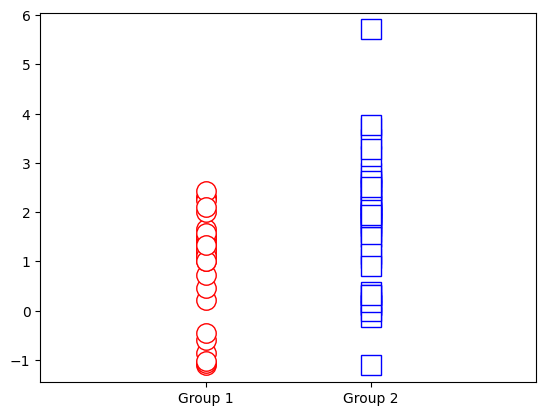


T-test section
Ha: there is a difference between the groups
Ho: no difference between the groups

t-test result: -2.8467720222731647
p-value: 0.0058340123476585985
Reject the null hypothesis


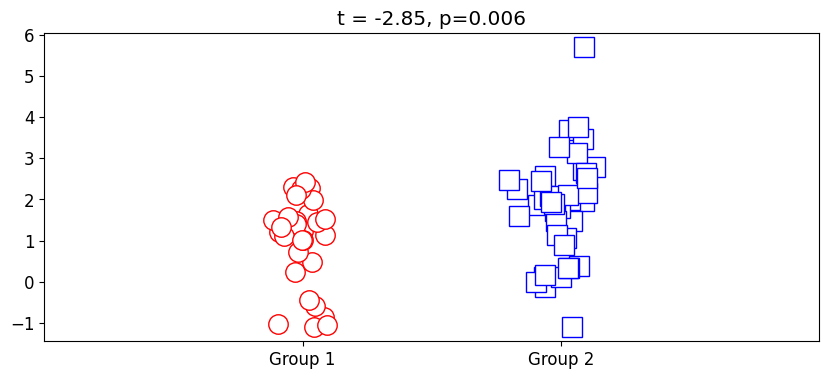

In [41]:
## Lesson: t-tests ##

# parameters
n1 = 30 # samples in dataset 1
n2 = 40 
mu1 = 1 # population mean in dataset 1
mu2 = 2 # population mean in dataset 2

# generte the data
data1 = mu1 + np.random.randn(n1)
data2 = mu2 + np.random.randn(n2)

# plot the data
plt.plot(np.zeros(n1), data1, 'ro',markerfacecolor='w',markersize=14)
plt.plot(np.ones(n2),data2,'bs',markerfacecolor='w',markersize=14)
plt.xlim([-1,2])
plt.xticks([0,1],labels=['Group 1','Group 2'])
plt.show()

# use the t-test via stats package to determine wheter there is a significant difference between the two groups
print('\nT-test section')
print('Ha: there is a difference between the groups')
print('Ho: no difference between the groups\n')

# t-test results
# _ind = independent samples
t,p = stats.ttest_ind(data1,data2)
print(f't-test result: {t}')
print(f'p-value: {p}')

# interpretation
print("Reject the null hypothesis")

## common way to show the t-test results in a plot (this is much better)
fig = plt.figure(figsize=(10,4))
plt.rcParams.update({'font.size': 12}) # change the font size
plt.plot(0+np.random.randn(n1)/15, data1, 'ro',markerfacecolor='w',markersize=14)
plt.plot(1+np.random.randn(n2)/15, data2, 'bs',markerfacecolor='w',markersize=14)
plt.xlim([-1,2])
plt.xticks([0,1],labels=['Group 1', 'Group 2'])

# set the title to include the t-value and p-value
plt.title(f't = {t:.2f}, p={p:.3f}')
plt.show()

function: 2*x**2
derivative: 4*x


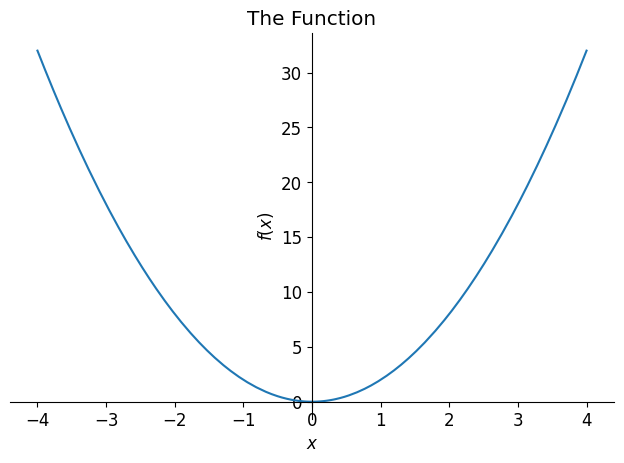

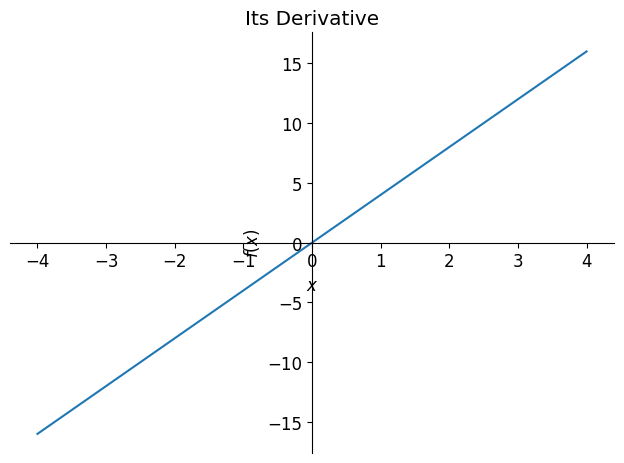

In [47]:
## Lesson: Derivatives and Polynomials ##
# use the sympy library

# create symbolic variables in sympy
x = sym.symbols('x')

# create a function
fx = 2*x**2

# compute its derivative
df = sym.diff(fx,x)

# print the function
print(f'function: {fx}')

# print the derivative
print(f'derivative: {df}')

# plot the function
symplot(fx,(x,-4,4), title='The Function')
plt.show()

# plot the derivative
symplot(df,(x,-4,4),title='Its Derivative')
plt.show()

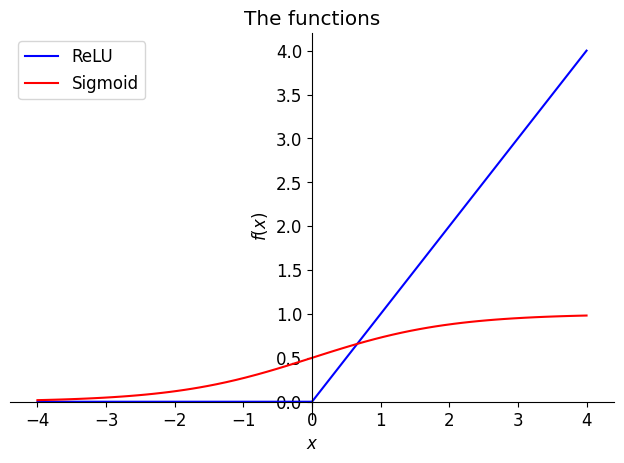

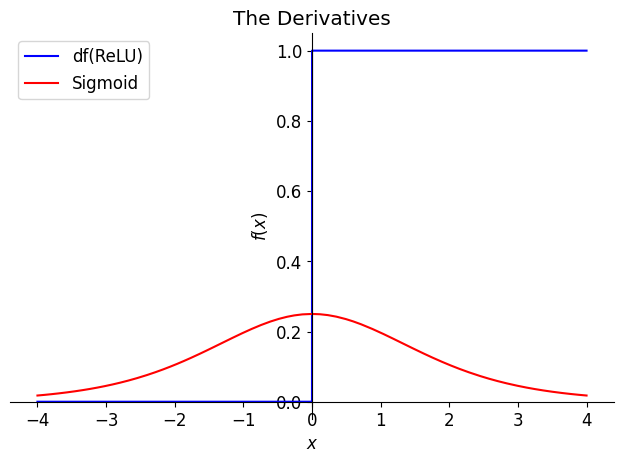

In [49]:
## Lesson: Derivatives and the relu and sigmoid functions ##
# use the sympy library

# create symbolic variables in sympy
x = sym.symbols('x')

# create symbolic functions
relu = sym.Max(0,x)
sigmoid = 1 / (1+sym.exp(-x))

# graph the functions
p = symplot(relu,(x,-4,4),label='ReLU', show=False, line_color='blue')
p.extend( symplot(sigmoid,(x,-4,4),label='Sigmoid',show=False, line_color='red'))
p.legend = True
p.title = 'The functions'
p.show()

# graph the derivatives
p = symplot(sym.diff(relu),(x,-4,4), label='df(ReLU)', show=False,line_color='blue')
p.extend( symplot(sym.diff(sigmoid),(x,-4,4), label='Sigmoid',show=False, line_color='red'))
p.legend = True
p.title = 'The Derivatives'
p.show()

In [6]:
## Lesson: compute derivatives using the product rule ##

# create symbolic variables in sympy
x = sym.symbols('x')

# create two functions
fx = 2*x**2
gx = 4*x**3 - 3*x**4

# compute their individual derivatives
df = sym.diff(fx)
dg = sym.diff(gx)

# apply the product rule "manually"
manual = df*gx + fx*dg
theWrongWay = df*dg

# via sympy
viasympy = sym.diff(fx*gx)

# print the functions
print('The functions:')
display(fx)
display(gx)
print(' ')

# print the derivatives
print('Their derivatives:')
display(df)
display(dg)
print(' ')

# print the product rule done manually
print('Manual product rule:')
display(manual)
print(' ')

# print the product rule via sympy
print('Product rule via sympy:')
display(viasympy)

The functions:


2*x**2

-3*x**4 + 4*x**3

 
Their derivatives:


4*x

-12*x**3 + 12*x**2

 
Manual product rule:


2*x**2*(-12*x**3 + 12*x**2) + 4*x*(-3*x**4 + 4*x**3)

 
Product rule via sympy:


2*x**2*(-12*x**3 + 12*x**2) + 4*x*(-3*x**4 + 4*x**3)

In [7]:
## Lesson: compute derivatives using the chain rule ##

gx = x**2 + 4*x**3
fx = ( gx )**5

print('The function:')
display(fx)
print(' ')

print('Its derivative:')
display(sym.diff(fx))

The function:


(4*x**3 + x**2)**5

 
Its derivative:


(60*x**2 + 10*x)*(4*x**3 + x**2)**4

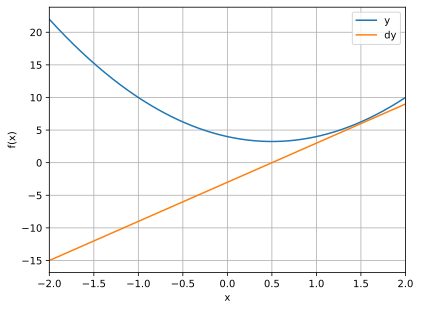

In [2]:
## Lesson: Gradient Descent in 1D ##

# IPython module
# draw the figures in vector format
from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('svg')

# function (as aa funciton)
def fx(x):
    return 3*x**2 - 3*x + 4

# derivative function
def deriv(x):
    return 6*x - 3

# plot the function and its derivative
# define a range for x
x = np.linspace(-2,2,2001)

# plotting
plt.plot(x,fx(x), x, deriv(x))
plt.xlim(x[ [0,-1] ])
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['y', 'dy'])
plt.show()

local minimum:  [0.186]
new local minimum:  [0.49935477]


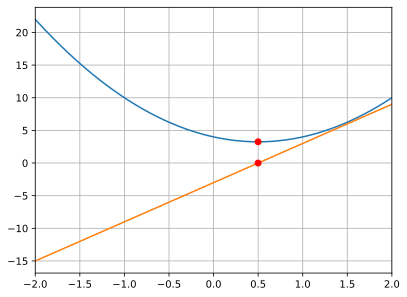

In [3]:
## Topic: Gradient Descent in 1D ##
# Lesson: create the learning algorithm

# random starting point
localmin = np.random.choice(x,1)
print('local minimum: ', localmin)

# learning parameters
learning_rate = .01
training_epochs = 100

# the learning algorithm (gradient descent algorithm)
for i in range(training_epochs):
    grad = deriv(localmin)
    localmin = localmin - learning_rate*grad
print('new local minimum: ',localmin)
    
# plot the results
plt.plot(x,fx(x), x,deriv(x))
plt.plot(localmin, deriv(localmin), 'ro')
plt.plot(localmin, fx(localmin), 'ro')
plt.xlim(x[[0,-1]])
plt.grid()

local minimum:  0.3620000000000001


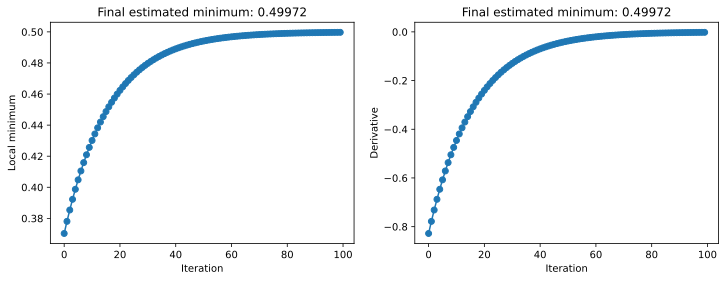

In [4]:
## Topic: Gradient Descent in 1D ##

# Random starting point
localmin = np.random.choice(x, 1)[0]  # Extract scalar value
print('local minimum: ', localmin)

# Learning parameters
learning_rate = 0.01
training_epochs = 100

# Gradient descent algorithm
# Run through the training and store all results
modelparams = np.zeros((training_epochs, 2))
for i in range(training_epochs):
    grad = deriv(localmin)
    localmin = localmin - learning_rate * grad
    modelparams[i, :] = localmin, grad

# plot the gradient over iterations
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

for i in range(2):
    ax[i].plot(modelparams[:, i], 'o-')
    ax[i].set_xlabel('Iteration')
    ax[i].set_title(f'Final estimated minimum: {localmin:.5f}')
    
ax[0].set_ylabel('Local minimum')
ax[1].set_ylabel('Derivative')
plt.show()

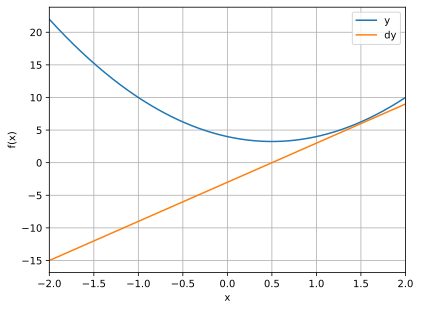

local minimum:  [-0.712]
new local minimum:  [0.49750949]
local minimum:  -0.8559999999999999


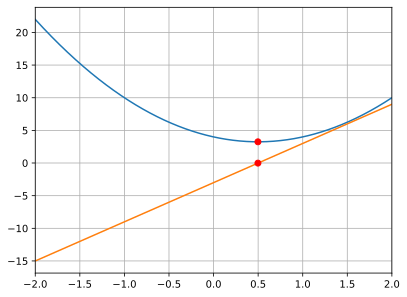

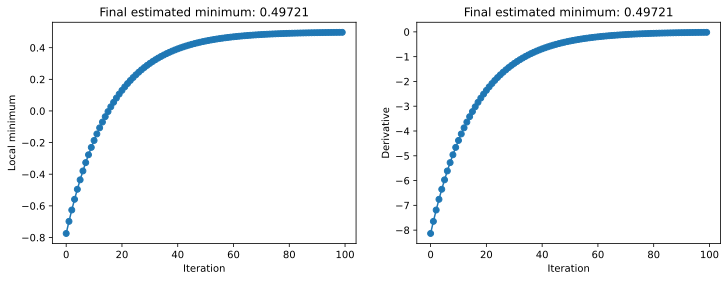

In [5]:
## Topic: The Gradient Descent Algorithm in 1D (all the code in one place) ##

# IPython module
# draw the figures in vector format
from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('svg')

# function (as aa funciton)
def fx(x):
    return 3*x**2 - 3*x + 4

# derivative function
def deriv(x):
    return 6*x - 3

# plot the function and its derivative
# define a range for x
x = np.linspace(-2,2,2001)

# plotting
plt.plot(x,fx(x), x, deriv(x))
plt.xlim(x[ [0,-1] ])
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['y', 'dy'])
plt.show()

# random starting point
localmin = np.random.choice(x,1)
print('local minimum: ', localmin)

# learning parameters
learning_rate = .01
training_epochs = 100

# the learning algorithm (gradient descent algorithm)
for i in range(training_epochs):
    grad = deriv(localmin)
    localmin = localmin - learning_rate*grad
print('new local minimum: ',localmin)
    
# plot the results
plt.plot(x,fx(x), x,deriv(x))
plt.plot(localmin, deriv(localmin), 'ro')
plt.plot(localmin, fx(localmin), 'ro')
plt.xlim(x[[0,-1]])
plt.grid()

# Random starting point
localmin = np.random.choice(x, 1)[0]  # Extract scalar value
print('local minimum: ', localmin)

# Learning parameters
learning_rate = 0.01
training_epochs = 100

# Gradient descent algorithm
# Run through the training and store all results
modelparams = np.zeros((training_epochs, 2))
for i in range(training_epochs):
    grad = deriv(localmin)
    localmin = localmin - learning_rate * grad
    modelparams[i, :] = localmin, grad

# plot the gradient over iterations
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

for i in range(2):
    ax[i].plot(modelparams[:, i], 'o-')
    ax[i].set_xlabel('Iteration')
    ax[i].set_title(f'Final estimated minimum: {localmin:.5f}')
    
ax[0].set_ylabel('Local minimum')
ax[1].set_ylabel('Derivative')
plt.show()

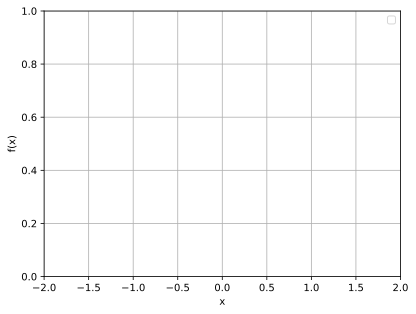

local minimum from random start value:  -0.4758
Function value at local minimum (random start):  -0.7620765451367073


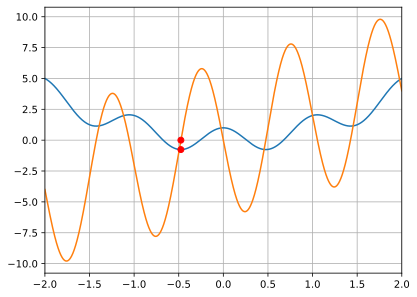

In [46]:
## code challenge #
## Topic: The Gradient Descent Algorithm in 1D with a random starting point ##

# IPython module
# draw the figures in vector format
from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('svg')

# function (as a function)
def fx(x):
    return np.cos(2*np.pi*x) + x**2

# derivative function
def deriv(x):
    return -2 * np.pi * np.sin(2 * np.pi * x) + 2 * x

# plot the function and its derivative
# define a range for x
x = np.linspace(-2,2,2001)

# plotting
plt.plot(x,fx(x), x, deriv(x))
plt.xlim(x[ [0,-1] ])
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['y', 'dy'])
plt.show()

# Learning parameters
learning_rate = 0.01
training_epochs = 1000

# Gradient descent function
def gradient_descent(start_point, learning_rate, training_epochs):
    current_x = start_point
    for i in range(training_epochs):
        previous_x = current_x
        current_x = current_x - learning_rate * deriv(previous_x)
    return current_x

# Random starting point
random_start = np.random.choice(x,1)[0]  
localmin_random = gradient_descent(random_start, learning_rate, training_epochs)
localmin_rounded = round(localmin_random,4)
print('local minimum from random start value: ', localmin_rounded)
print('Function value at local minimum (random start): ', fx(localmin_rounded))

# plot the results
plt.plot(x,fx(x), x,deriv(x))
plt.plot(localmin_rounded, deriv(localmin_rounded), 'ro')
plt.plot(localmin_rounded, fx(localmin_rounded), 'ro')
plt.xlim(x[[0,-1]])
plt.grid()

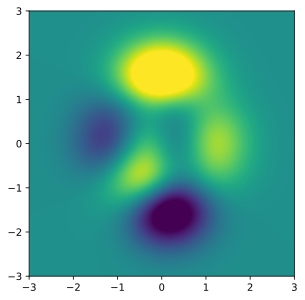

-1.07369833656079
[-2.54224464724350 2.33926412961588]
[-1.50848558  1.98545356]


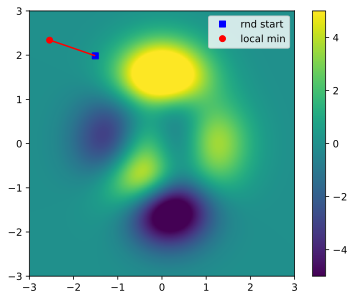

In [70]:
## Topic: The Gradient Descent Algorithm in 2D ##
# f(x,y) = using partial derivatives

# the "peaks" function
def peaks(x,y):
    # expand to 2D mesh
    x,y = np.meshgrid(x,y)
    
    z = 3*(1-x)**2 * np.exp(-(x**2) - (y+1)**2) - 10*(x/5 - x**3 - y**5) * np.exp(-x**2-y**2) - 1/3*np.exp(-(x+1)**2 - y**2)
  
    return z

# create the landscape
x = np.linspace(-3,3,201)
y = np.linspace(-3,3,201)

Z = peaks(x,y)

# let's have a look!
plt.imshow(Z,extent=[x[0],x[-1],y[0],y[-1]],vmin=-5,vmax=5,origin='lower')
plt.show()


# create derivative functions using sympy
sx,sy = sym.symbols('sx,sy')

sZ = 3*(1-sx)**2 * sym.exp(-(sx**2) - (sy+1)**2) \
      - 10*(sx/5 - sx**3 - sy**5) * sym.exp(-sx**2-sy**2) \
      - 1/3*sym.exp(-(sx+1)**2 - sy**2)

# create functions from the sympy-computed derivatives
df_x = sym.lambdify( (sx,sy),sym.diff(sZ,sx),'sympy' )
df_y = sym.lambdify( (sx,sy),sym.diff(sZ,sy),'sympy' )

print(df_x(1,1).evalf())

# random starting point (uniform between -2 and +2)
localmin = np.random.rand(2)*4-2 # also try specifying coordinates
startpnt = localmin[:] # make a copy, not re-assign

# learning parameters
learning_rate = .01
training_epochs = 1000

# run through training
trajectory = np.zeros((training_epochs,2))
for i in range(training_epochs):
  grad = np.array([ df_x(localmin[0],localmin[1]).evalf(), 
                    df_y(localmin[0],localmin[1]).evalf() 
                  ])
  localmin = localmin - learning_rate*grad  # add _ or [:] to change a variable in-place
  trajectory[i,:] = localmin

print(localmin)
print(startpnt)

# let's have a look!
plt.imshow(Z,extent=[x[0],x[-1],y[0],y[-1]],vmin=-5,vmax=5,origin='lower')
plt.plot(startpnt[0],startpnt[1],'bs')
plt.plot(localmin[0],localmin[1],'ro')
plt.plot(trajectory[:,0],trajectory[:,1],'r')
plt.legend(['rnd start','local min'])
plt.colorbar()
plt.show()

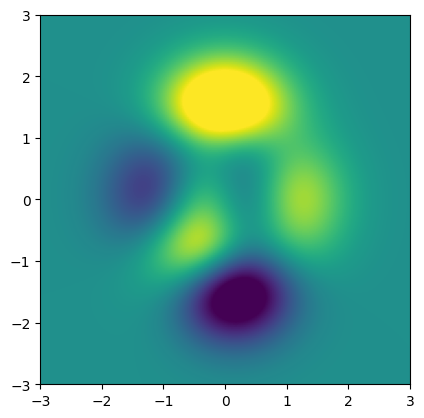

-1.07369833656079
[-0.460024518034387 -0.629196508716801]
[-1.689613   -0.64163723]


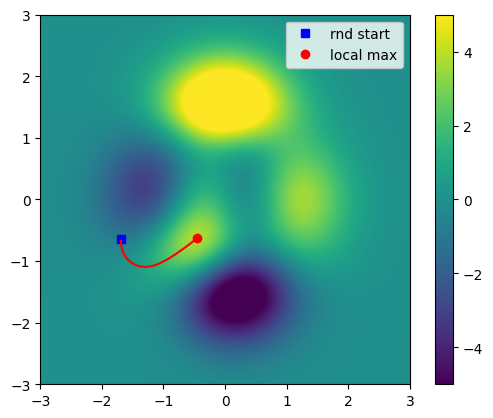

In [8]:
## code challenge  - modify the 2D gradient descent code to perform gradient ascent #

# Gradient Descent: move opposite to the gradient to minimize the loss function
# Gradient Ascent: move in the direction of the gradient to maximize the objective function

# There are multiple ways to change this to a max function:
# 1) localmin = localmin + learning_rate*grad 
# 2) negate the gradient by using a negative: grad = -np.array([...])

# the "peaks" function
def peaks(x,y):
    # expand to 2D mesh
    x,y = np.meshgrid(x,y)
    
    z = 3*(1-x)**2 * np.exp(-(x**2) - (y+1)**2) - 10*(x/5 - x**3 - y**5) * np.exp(-x**2-y**2) - 1/3*np.exp(-(x+1)**2 - y**2)
  
    return z

# create the landscape
x = np.linspace(-3,3,201)
y = np.linspace(-3,3,201)

Z = peaks(x,y)

# let's have a look!
plt.imshow(Z,extent=[x[0],x[-1],y[0],y[-1]],vmin=-5,vmax=5,origin='lower')
plt.show()

# create derivative functions using sympy
sx,sy = sym.symbols('sx,sy')

sZ = 3*(1-sx)**2 * sym.exp(-(sx**2) - (sy+1)**2) \
      - 10*(sx/5 - sx**3 - sy**5) * sym.exp(-sx**2-sy**2) \
      - 1/3*sym.exp(-(sx+1)**2 - sy**2)

# create functions from the sympy-computed derivatives
df_x = sym.lambdify( (sx,sy),sym.diff(sZ,sx),'sympy' )
df_y = sym.lambdify( (sx,sy),sym.diff(sZ,sy),'sympy' )

print(df_x(1,1).evalf())

# random starting point (uniform between -2 and +2)
localmin = np.random.rand(2)*4-2 # also try specifying coordinates
startpnt = localmin[:] # make a copy, not re-assign

# learning parameters
learning_rate = .01
training_epochs = 1000

# run through training
trajectory = np.zeros((training_epochs,2))
for i in range(training_epochs):
  grad = np.array([ df_x(localmin[0],localmin[1]).evalf(), 
                    df_y(localmin[0],localmin[1]).evalf() 
                  ])
  localmin = localmin + learning_rate*grad  # add the localmin to the lr*gradient to maximize the objective function
  trajectory[i,:] = localmin

print(localmin)
print(startpnt)

# let's have a look!
plt.imshow(Z,extent=[x[0],x[-1],y[0],y[-1]],vmin=-5,vmax=5,origin='lower')
plt.plot(startpnt[0],startpnt[1],'bs')
plt.plot(localmin[0],localmin[1],'ro')
plt.plot(trajectory[:,0],trajectory[:,1],'r')
plt.legend(['rnd start','local max'])
plt.colorbar()
plt.show()

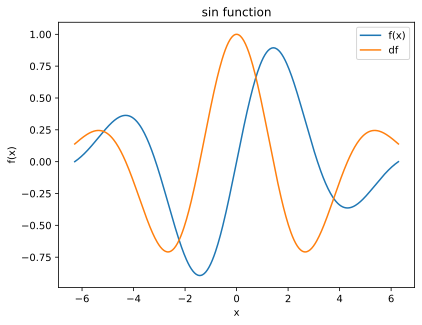

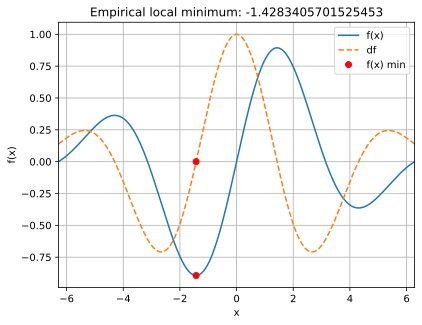

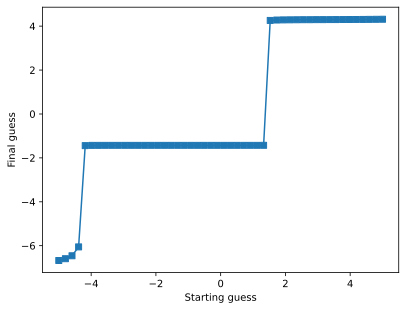

Interpretation
Focus on the middle line.
The final global minimum is about 1.4.
When we start our initial guess between -4 and about 1.5 the function goes down to a global minimum.

When we start our initial guess between 2 and about 4 the function goes down to a local minimum.

You can visually confirm these results by looking at the graph.

Now why do we even need this graph when we can visuall see where the global and local minima are on the sin function?
The reason is this. for more complicated function in multiple dimensions it will not be possible to visually inspect the graphs.


In [30]:
## Topic: The Gradient Descent Algorithm ##
# Lesson: How to setup and run a one-variable parametric experiment and interpret the results
## Experiment 1: systematically vary the starting locations ##

# use to draw graphs in vector format
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

# the function
x  = np.linspace(-2*np.pi,2*np.pi,401)
sinFunc = np.sin(x) * np.exp(-x**2*.05)

# and its derivative
df = np.cos(x)*np.exp(-x**2*.05) + np.sin(x)*(-.1*x)*np.exp(-x**2*.05) 

# quick plot for inspection
plt.plot(x,sinFunc, x,df)
plt.title('sin function')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['f(x)','df'])
plt.show()

# function 
def fx(x):
  return np.sin(x) * np.exp(-x**2*.05)

# derivative function
def deriv(x):
  return np.cos(x)*np.exp(-x**2*.05) - np.sin(x)*.1*x*np.exp(-x**2*.05)

# random starting point
localmin = np.random.choice(x,1)#np.array([6])#

# learning parameters
learning_rate = .01
training_epochs = 1000

# run through training
for i in range(training_epochs):
  grad = deriv(localmin)
  localmin = localmin - learning_rate*grad

# plot the results
plt.plot(x,fx(x), x,deriv(x),'--')
plt.plot(localmin,deriv(localmin),'ro')
plt.plot(localmin,fx(localmin),'ro')

plt.xlim(x[[0,-1]])
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['f(x)','df','f(x) min'])
plt.title('Empirical local minimum: %s'%localmin[0])
plt.show()


# Experiment: vary the starting location
# vary the starting location between -5 and 5
start_location = np.linspace(-5,5,50) 
# print(start_location)

# initialize an array to store the final results of the experiment.
final_results = np.zeros(len(start_location))

# loop over the starting points
for idx,localmin in enumerate(start_location):
    
  # re-run the gradient descent with different starting initial starting locations
  for i in range(training_epochs):
    grad = deriv(localmin)
    localmin = localmin - learning_rate*grad
  
  # store the final guess
  final_results[idx] = localmin

# plot the results
plt.plot(start_location,final_results,'s-')
plt.xlabel('Starting guess')
plt.ylabel('Final guess')
plt.show()

# interpretation of the results
print("Interpretation")
print("Focus on the middle line.\nThe final global minimum is about 1.4.")
print("When we start our initial guess between -4 and about 1.5 the function goes down to a global minimum.\n")
print("When we start our initial guess between 2 and about 4 the function goes down to a local minimum.\n")
print("You can visually confirm these results by looking at the graph.\n")
print("Now why do we even need this graph when we can visuall see where the global and local minima are on the sin function?")
print("The reason is this. for more complicated function in multiple dimensions it will not be possible to visually inspect the graphs.")

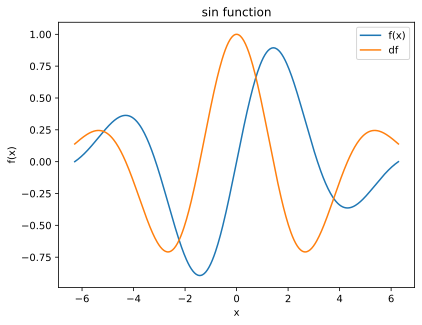

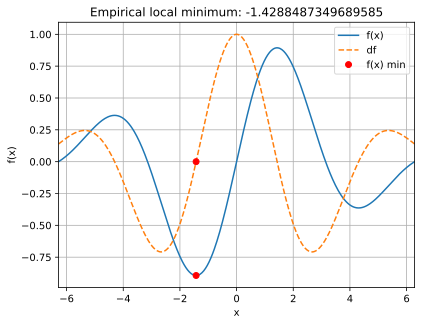

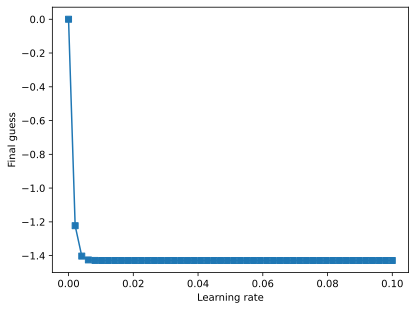

Interpretation
When the learning rate is really small the final guess is essentially the first guess.
This happens because the gradient descent function takes such small steps that in effect it does not move at all.
As the learning rate gets larger then it moves towrds the global minimum and remains relatively constant thereafter.
This particular dataset is robust to the learning rate which is relatively common.


In [38]:
## Topic: The Gradient Descent Algorithm ##
# Lesson: How to setup and run a one-variable parametric experiment and interpret the results
## Experiment 2: systematically vary the learning rate ##

# use to draw graphs in vector format
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

# the function
x  = np.linspace(-2*np.pi,2*np.pi,401)
sinFunc = np.sin(x) * np.exp(-x**2*.05)

# and its derivative
df = np.cos(x)*np.exp(-x**2*.05) + np.sin(x)*(-.1*x)*np.exp(-x**2*.05) 

# quick plot for inspection
plt.plot(x,sinFunc, x,df)
plt.title('sin function')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['f(x)','df'])
plt.show()

# function 
def fx(x):
  return np.sin(x) * np.exp(-x**2*.05)

# derivative function
def deriv(x):
  return np.cos(x)*np.exp(-x**2*.05) - np.sin(x)*.1*x*np.exp(-x**2*.05)

# random starting point
localmin = np.random.choice(x,1)#np.array([6])#

# learning parameters
learning_rate = .01
training_epochs = 1000

# run through training
for i in range(training_epochs):
  grad = deriv(localmin)
  localmin = localmin - learning_rate*grad

# plot the results
plt.plot(x,fx(x), x,deriv(x),'--')
plt.plot(localmin,deriv(localmin),'ro')
plt.plot(localmin,fx(localmin),'ro')

plt.xlim(x[[0,-1]])
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['f(x)','df','f(x) min'])
plt.title('Empirical local minimum: %s'%localmin[0])
plt.show()

# experiment: vary the learning rates
learning_rates = np.linspace(1e-10,1e-1,50) # use different learning rates
final_results = np.zeros(len(learning_rates))

# loop over the learning rates
for idx,learningRate in enumerate(learning_rates):
    
    # force starting guess to 0
    # we fix this variable to ensure we only test one variable (learning rate) at a time 
    localmin = 0 
    
    # re-run the gradient descent using a variety of learning rates
    for i in range(training_epochs):
        grad = deriv(localmin)
        localmin = localmin - learningRate*grad
  
    # store the final guess
    final_results[idx] = localmin

# plot the results
plt.plot(learning_rates,final_results,'s-')
plt.xlabel('Learning rate')
plt.ylabel('Final guess')
plt.show()

# interpretation of the results
print("Interpretation")
print("When the learning rate is really small the final guess is essentially the first guess.\nThis happens because the gradient descent function takes such small steps that in effect it does not move at all.")
print("As the learning rate gets larger then it moves towrds the global minimum and remains relatively constant thereafter.")
print("This particular dataset is robust to the learning rate which is relatively common.")

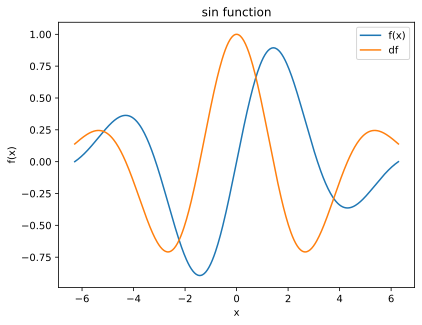

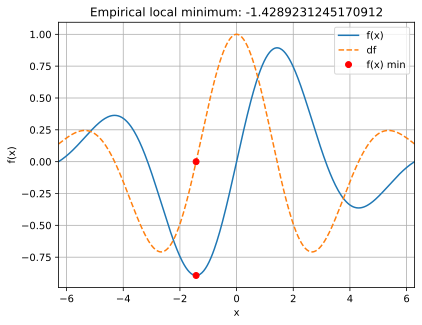

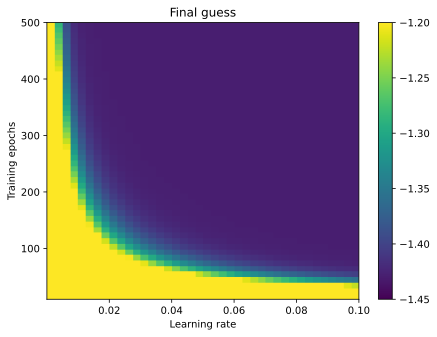

Color Interpretation:
Dark Blue is good and means you are going towards and arriving at the global minimum.
Yellow is bad and mean you are going towards but not arriviing at the global minimum.

Interpretation of the hyperparameters:
Learning Rate: a higher learning rate leads to better results (i.e. arriving at the global minimum).
Training Epochs: when the number of training epochs is large this als leads to better results (i.e. arriving at the global minimum).
Conversely, when the number of training epochs or the learning rate is too small then the model does not get good results.

Results of Combining Hyperparameters and Interpretation: 
We can see that 100 training epochs is not enough but combined with larger learning rates >0.04 is enough to get good results.


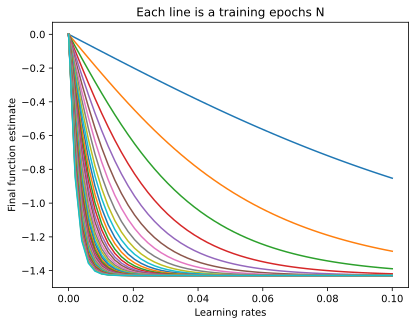

The graph takes each row of the matrix and plots it as a separate line.
The y-axis has changed from the previous graph. The y-axis corresponds to the color axis in the previous graph.
We want all of the data to be at -1.4 becuase that represents the global minimum.
Any point along the graphs that do not correspond to y = -1.4 means it is not a good combination of learning rates and training epochs.


In [45]:
## Topic: The Gradient Descent Algorithm ##
# Lesson: How to setup and run a two-variable parametric experiment and interpret the results
## Experiment 3: manipulate and observe the interaction between the learning rate and training epochs ##

# use to draw graphs in vector format
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

# the function
x  = np.linspace(-2*np.pi,2*np.pi,401)
sinFunc = np.sin(x) * np.exp(-x**2*.05)

# and its derivative
df = np.cos(x)*np.exp(-x**2*.05) + np.sin(x)*(-.1*x)*np.exp(-x**2*.05) 

# quick plot for inspection
plt.plot(x,sinFunc, x,df)
plt.title('sin function')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['f(x)','df'])
plt.show()

# function 
def fx(x):
  return np.sin(x) * np.exp(-x**2*.05)

# derivative function
def deriv(x):
  return np.cos(x)*np.exp(-x**2*.05) - np.sin(x)*.1*x*np.exp(-x**2*.05)

# random starting point
localmin = np.random.choice(x,1)#np.array([6])#

# learning parameters
learning_rate = .01
training_epochs = 1000

# run through training
for i in range(training_epochs):
  grad = deriv(localmin)
  localmin = localmin - learning_rate*grad

# plot the results
plt.plot(x,fx(x), x,deriv(x),'--')
plt.plot(localmin,deriv(localmin),'ro')
plt.plot(localmin,fx(localmin),'ro')

plt.xlim(x[[0,-1]])
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['f(x)','df','f(x) min'])
plt.title('Empirical local minimum: %s'%localmin[0])
plt.show()

# Experiment 3: interaction between learning rate and training epochs
# setup parameters
learningrates = np.linspace(1e-10,1e-1,50)
training_epochs = np.round(np.linspace(10,500,40))

# initialize matrix to store results
final_results = np.zeros((len(learningrates),len(training_epochs)))

# loop over learning rates
for LearnRate_idx,learningRate in enumerate(learningrates):

  # loop over training epochs
  for Epochs_idx,trainEpochs in enumerate(training_epochs):
  
    # run through training (again fixing starting location)
    localmin = 0
    for i in range(int(trainEpochs)):
      grad = deriv(localmin)
      localmin = localmin - learningRate*grad
    
    # store the final guess
    final_results[LearnRate_idx,Epochs_idx] = localmin

# plot the results
fig,ax = plt.subplots(figsize=(7,5))

plt.imshow(final_results,extent=[learningrates[0],learningrates[-1],training_epochs[0],training_epochs[-1]],
           aspect='auto',origin='lower',vmin=-1.45,vmax=-1.2)
plt.xlabel('Learning rate')
plt.ylabel('Training epochs')
plt.title('Final guess')
plt.colorbar()
plt.show()

# interpretation of the results
print("Color Interpretation:")
print("Dark Blue is good and means you are going towards and arriving at the global minimum.")
print("Yellow is bad and mean you are going towards but not arriviing at the global minimum.\n")
print("Interpretation of the hyperparameters:")
print("Learning Rate: a higher learning rate leads to better results (i.e. arriving at the global minimum).")
print("Training Epochs: when the number of training epochs is large this als leads to better results (i.e. arriving at the global minimum).")
print("Conversely, when the number of training epochs or the learning rate is too small then the model does not get good results.\n")
print("Results of Combining Hyperparameters and Interpretation: ")
print("We can see that 100 training epochs is not enough but combined with larger learning rates >0.04 is enough to get good results.")

# another visualization
plt.plot(learningrates,final_results)
plt.xlabel('Learning rates')
plt.ylabel('Final function estimate')
plt.title('Each line is a training epochs N')
plt.show()

# interpretation of the results
print("The graph takes each row of the matrix and plots it as a separate line.")
print("The y-axis has changed from the previous graph. The y-axis corresponds to the color axis in the previous graph.")
print("We want all of the data to be at -1.4 becuase that represents the global minimum.")
print("Any point along the graphs that do not correspond to y = -1.4 means it is not a good combination of learning rates and training epochs.")

In [ ]:
## Topic: ## 
## Lesson: ##